/var/folders/c0/_b6c00gj3x56bbmcgtgs73gr0000gn/T/ipykernel_83654/563449221.py:36: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  pct_change_df = combined_df.pct_change() * 100


Raw Values:
             US GDP (Billions $)  Consumer Price Index (CPI)  \
Date                                                          
2025-04-01            30353.902                     320.321   
2025-05-01                  NaN                     320.580   
2025-06-01                  NaN                     321.500   
2025-07-01                  NaN                     322.132   
2025-08-01                  NaN                     323.364   

            Unemployment Rate (%)  Federal Funds Rate (%)  
Date                                                       
2025-04-01                    4.2                    4.33  
2025-05-01                    4.2                    4.33  
2025-06-01                    4.1                    4.33  
2025-07-01                    4.2                    4.33  
2025-08-01                    4.3                    4.33  

% Change:
             US GDP (Billions $)  Consumer Price Index (CPI)  \
Date                                              

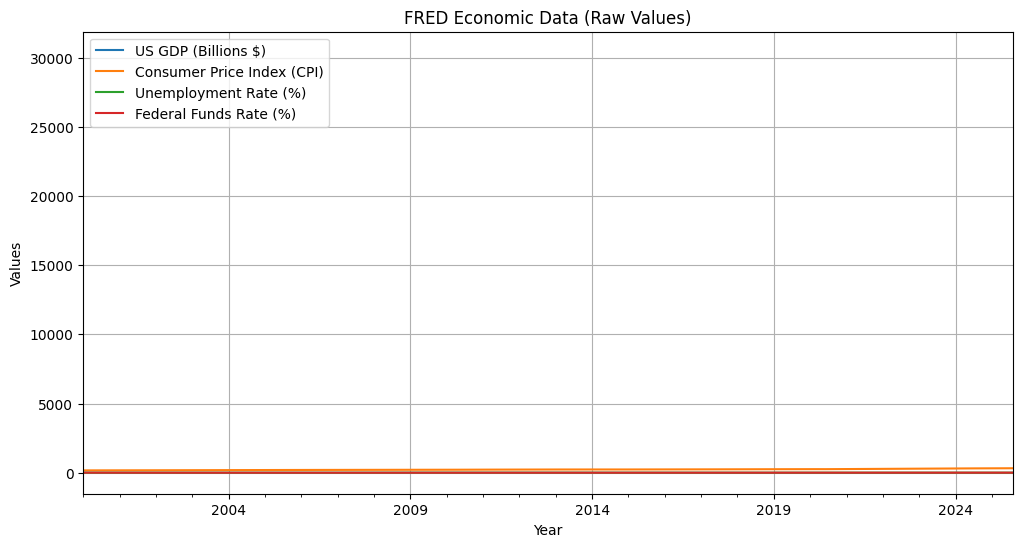

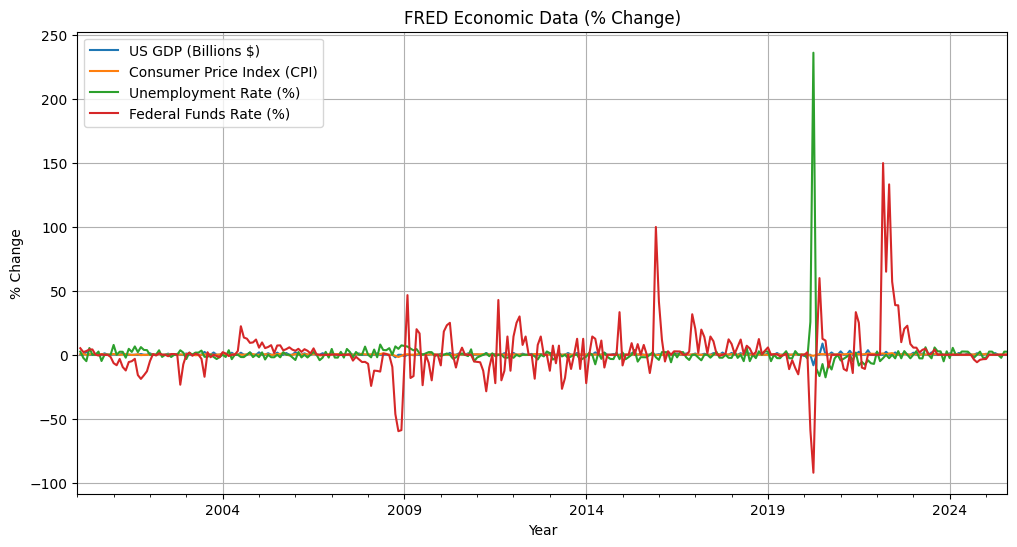

In [2]:
# -----------------------------
# FRED API Multi-Series Template (Raw + % Change)
# -----------------------------

from fredapi import Fred
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Set your API key
API_KEY = '39b987c126102824ebdbd9413dd75251'  # Replace with your FRED API key
fred = Fred(api_key=API_KEY)

# 2️⃣ Choose series IDs and labels
series_dict = {
    'GDP': 'US GDP (Billions $)',
    'CPIAUCSL': 'Consumer Price Index (CPI)',
    'UNRATE': 'Unemployment Rate (%)',
    'FEDFUNDS': 'Federal Funds Rate (%)'
}

# 3️⃣ Fetch data
data_frames = []
for series_id, label in series_dict.items():
    series = fred.get_series(series_id)
    df = pd.DataFrame(series, columns=[label])
    df.index.name = 'Date'
    data_frames.append(df)

# 4️⃣ Combine all series into one DataFrame
combined_df = pd.concat(data_frames, axis=1)

# 5️⃣ Optional: Filter by date range
combined_df = combined_df.loc['2000-01-01':]  # e.g., from 2000 onwards

# 6️⃣ Compute % change
pct_change_df = combined_df.pct_change() * 100

# 7️⃣ Display last 5 rows
print("Raw Values:\n", combined_df.tail())
print("\n% Change:\n", pct_change_df.tail())

# 8️⃣ Plot raw values
combined_df.plot(figsize=(12,6), title='FRED Economic Data (Raw Values)')
plt.xlabel('Year')
plt.ylabel('Values')
plt.grid(True)
plt.show()

# 9️⃣ Plot % change
pct_change_df.plot(figsize=(12,6), title='FRED Economic Data (% Change)')
plt.xlabel('Year')
plt.ylabel('% Change')
plt.grid(True)
plt.show()
